<table>
    <tr>
      <td>
      <img src='https://www.pngitem.com/pimgs/m/432-4321754_eu-logo-european-union-hd-png-download.png' width=450>
      </td>
      <td>
      <img src='https://www.ideal-ist.eu/sites/default/files/2018-10/logo_quantum_flagship.jpg' width=510>
      </td>
      <td>
      <img src='https://newsroom.unl.edu/announce/files/file143411.jpg' width=310>
      </td>
     </tr>
</table>

<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;"><a href="https://qtom.qtedu.eu/shared-course/qtom-fridays-a-trip-through-the-world-of-quantum-technology/">QTOM Fridays – A trip through the world of Quantum Technology</a></h1> 
<h2 style="text-align: center;">Summer Semester 2022</h2>
<h2 style="text-align: center;"><a href="https://qt.eu/">European Union Quantum Flagship /</a> <a href="https://qtom.qtedu.eu/">QTEdu Quantum Technology Open Master</a></h2>
<h2 style="text-align: center;">IBM Quantum</h2>
<h3>Deutsch Josza Algorithm</h3>
<h3>Anastasiia Andriievska</h3>

</div>

In [12]:
import numpy as np
from numpy import pi 
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.tools import job_monitor
from qiskit.test.mock import FakeTokyo
simulator = Aer.get_backend('aer_simulator')

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-06-21 12:09:18,977: Credentials are already in use. The existing account in the session will be replaced.


## Oracles and the Deutsch-Jozsa algorithm

Many quantum algoritms revolve around the notion of so called $\textit{oracles}$. An oracle is a function that can be considered as a 'black box'. We generally want to find out specific properties of this function. We do this by asking questions to the oracle ($\textit{querying}$). The query complexity is then defined as the minimum number of queries in order to find these properties.


To get familiar with the use of oracles we will now consider the Deutsch-Josza problem. We will see that the quantum solution has a drastically lower query complexity than its classical counterpart.



### 1: Deutsch-Jozsa Problem <a id='djproblem'> </a>

We are given a hidden Boolean function $f$, which takes as input a string of bits, and returns either $0$ or $1$, that is:

$$
f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property of the given Boolean function is that it is guaranteed to either be balanced or constant. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant.

The Deutsch-Jozsa algorithm was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.


In [ ]:
oraclenr = 3 # determines the oracle (can range from 1 to 5)
oracle = dj_problem_oracle(oraclenr) # gives one out of 5 oracles
oracle.name = "DJ-Oracle"

This function gives a certain oracle with 5 input qubits. The last qubit ($q_4$) will be the output. In order to get a feeling for the oracle, let us create a circuit to which we add the oracle such that we can pass it different input strings and then measure the output of $q_4$. This corresponds to the classical way of determining whether the oracle is balanced or constant.

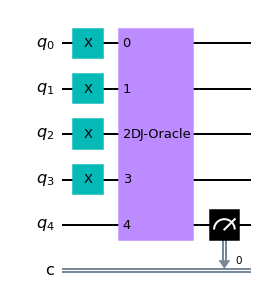

In [3]:
def dj_classical(n, input_str):
    
    # build a quantum circuit with n qubits and 1 classical readout bit
    dj_circuit = QuantumCircuit(n+1,1)
    
    # Prepare the initial state corresponding to your input bit string
    for i in range(n):
        if input_str[i] == '1':
            dj_circuit.x(i)
    
    # append oracle
    dj_circuit.append(oracle, range(n+1))
    
    # measure the fourth qubit 
    dj_circuit.measure(n,0)
    
    return dj_circuit
    
n = 4 # number of qubits
input_str = '1111'
dj_circuit = dj_classical(n, input_str)
dj_circuit.draw() # draw the circuit

Now we simulate the results to find the outcome of this circuit. Try different input bit strings (4 bits) to see the corresponding outputs!

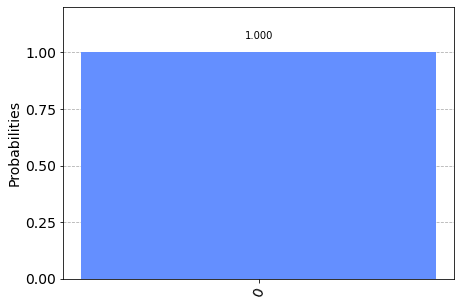

In [4]:
input_str='1111'   #e.g. try '1111', '0010', '1100'
dj_circuit = dj_classical(n, input_str)
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_dj_circuit = transpile(dj_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

### 2: Quantum Solution to the Deutsch-Josza Problem

Using a quantum computer, we can find out if the oracle is constant or balanced with 100% confidence after only one call to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle, which maps the state $\vert x\rangle \vert y\rangle $ to $ \vert x\rangle \vert y \oplus f(x)\rangle$, where $\oplus$ is addition modulo $2$. Below we will walk through the algorithm.

We start by preparing two quantum registers. The first is an $n$-qubit register initialised to $|0\rangle$, and the second is a one-qubit register initialised to $|-\rangle =\frac{1}{\sqrt{2}}\left(|0\rangle - |1 \rangle \right)$. Note, that with Qiskit states are described as $\vert b_3 b_2 b_1 b_0\rangle_{q_3q_2q_1q_0}$, i.e. just like for binary numbers, the last bit $b_0$ corresponds to the state of the first qubit. Thus, we want to initialize the state $$\vert \psi_0 \rangle = \vert -\rangle \otimes \vert0\rangle^{\otimes n}.$$

In [1]:
from qiskit_textbook.widgets import dj_widget
dj_widget(size="small", case="balanced")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


HTMLMath(value='$$ |00\\rangle = |00\\rangle $$')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xce\x00\x00\x00\xcc\x08\x06\x00\x00\x00;\xd7\x9c…

In [30]:
from qiskit.providers.ibmq import least_busy

<b> 1) Creating a Generalised Oracle

In [33]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

#### A function that takes this oracle gate and performs the Deutsch-Jozsa algorithm on it:

In [34]:
def dj_algorithm(oracle, n):
    dj_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    dj_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        dj_circuit.h(qubit)
    
    for i in range(n):
        dj_circuit.measure(i, i)
    
    return dj_circuit

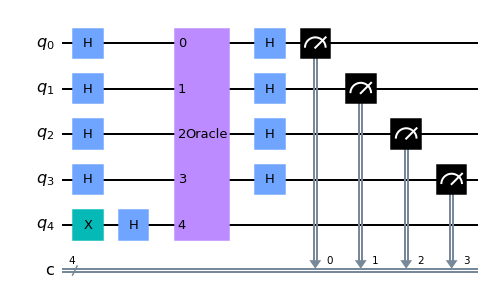

In [35]:
n = 4
oracle_gate = dj_oracle('balanced', n)
dj_circuit = dj_algorithm(oracle_gate, n)
dj_circuit.draw()

In [36]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2022-06-21 13:09:12,384: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibm_oslo


In [37]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

transpiled_dj_circuit = transpile(dj_circuit, backend, optimization_level=3)
job = backend.run(transpiled_dj_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


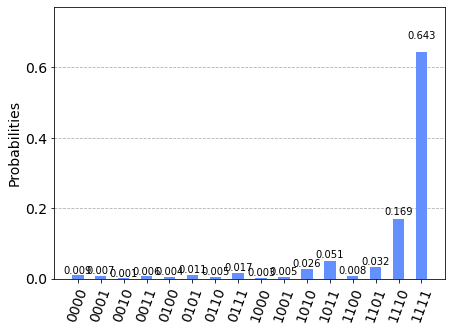

In [38]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

As we can see, the most likely result is `1111`. The other results are due to errors in the quantum computation. 

In [2]:
import qiskit.tools.jupyter
%qiskit_version_table